<a href="https://colab.research.google.com/github/luisahamon/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema: Descobrir fatores relevantes para o surgimento da diabetes

#Analise Exploratória

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
diabetes.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Não há dados nulos no conjunto de dados

In [5]:
diabetes.rename(columns={'Age': 'Idade', 
                           'Sex': 'Gênero',
                         'HighChol':'Colesterol_alto',
                         'CholCheck': 'Exame_colesterol',
                         'BMI': 'IMC',
                         'Smoker': 'Fumante',
                         'HeartDiseaseorAttack': 'Doenca_coracao',
                         'PhysActivity': 'Atividade_fisica',
                         'Fruits': 'Consumo_frutas',
                         'Veggies': 'Consumo_vegetais',
                         'HvyAlcoholConsump': 'Consumo_alcool',
                         'MentHlth': 'Saude_mental',
                         'PhysHlth': 'Saude_fisica',
                         'DiffWalk': 'Dificuldade_andar_escadas',
                         'Stroke': 'Derrame'
                         }, inplace=True)

In [6]:
diabetes

,Idade,Gênero,Colesterol_alto,Exame_colesterol,IMC,Fumante,Doenca_coracao,Atividade_fisica,Consumo_frutas,Consumo_vegetais,Consumo_alcool,GenHlth,Saude_mental,Saude_fisica,Dificuldade_andar_escadas,Derrame,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


*Hipóteses Iniciais*



*   Existe uma correlação positiva entre a diabetes e a idade
*   Existe uma correlação positiva entre a diabetes e o colesterol
*   Existe uma correlação positiva entre a diabetes e o IMC
*   Existe uma correlação positiva entre a diabetes e doenças do coração
*   Existe uma correlação negativa entre a diabetes e a prática de atividades físicas
*   Existe uma correlação positiva entre a diabetes e doenças em geral, ou seja, ter ficado doente no último mês








#Teste de Correlação - Comparação Gráfica

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

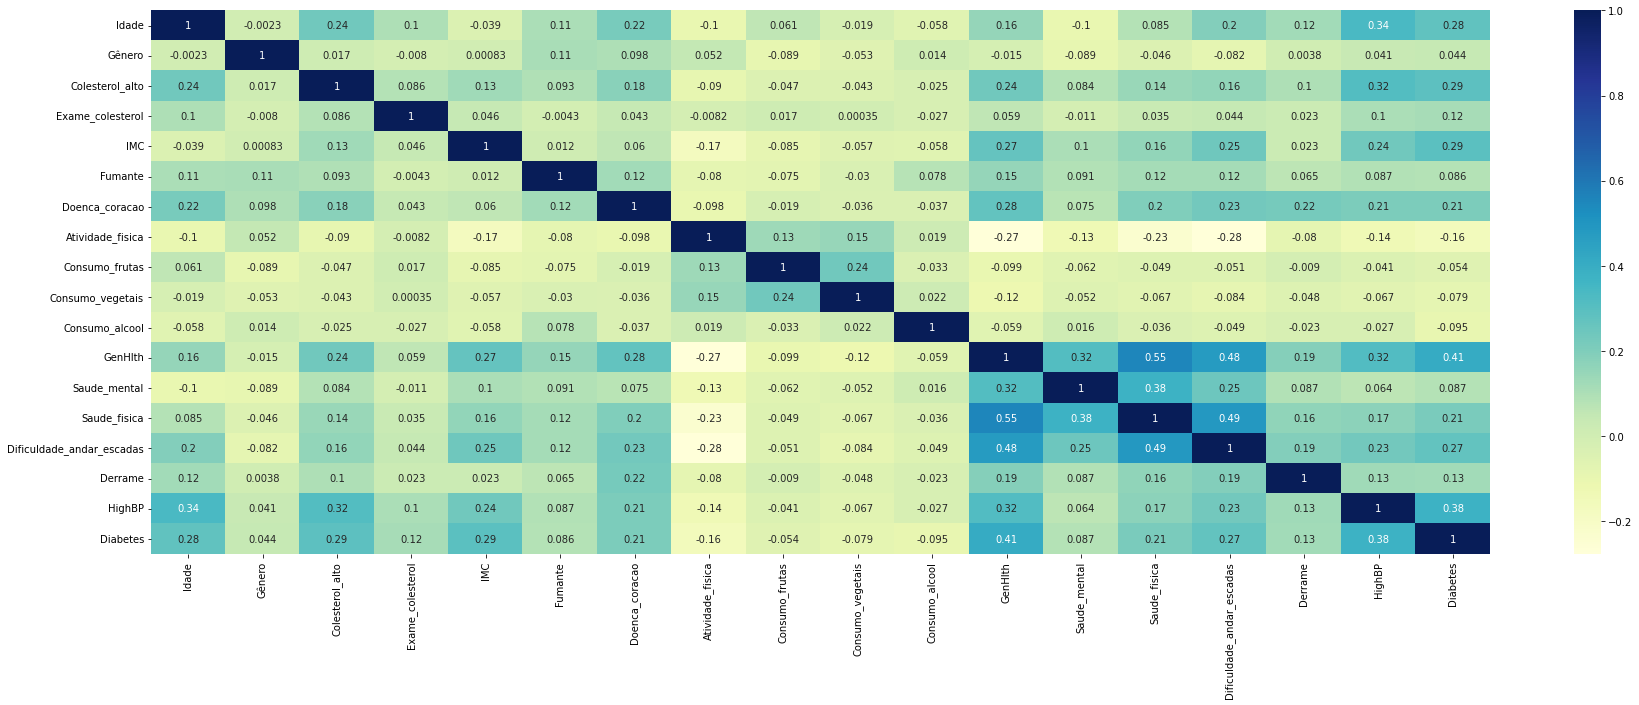

In [9]:
plt.figure(figsize=(30, 10))
dataplot = sns.heatmap(diabetes.corr(), cmap="YlGnBu", annot= True)
plt.show()

Com base nas correlações vemos que as hipóteses aparentam estar certas e que ainda existem outras variáveis com alta correlação com a diabetes - dificuldade para andar e/ou subir escadas, Derrame e HighBP

Sendo essas duas primeiras potencialmente consequências da diabetes

#Previsão da Diabetes com Base nos Fatores de Risco

Meu objetivo aqui é tentar prever a ocorrência ou não do diabetes com base nos fatores de relacionamento e em pesquisa sobre os fatores dessa doença:


*   Pressão alta;
*   Colesterol alto ou alterações na taxa de triglicérides no sangue;
*   Sobrepeso, principalmente se a gordura estiver concentrada em volta da cintura;
*   Diagnóstico de distúrbios psiquiátricos

Fonte: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/d/diabetes





Primeiro verifico quantas pessoas tem no total e quantas tem diabetes

In [12]:
total = diabetes['Idade'].count()
print(total)

70692


In [20]:
tem_diabetes = []
for i in range(len(diabetes)):
  if diabetes['Diabetes'][i] == 1:
    tem_diabetes.append(diabetes['Diabetes'][i])
len(tem_diabetes)

35346

In [24]:
perc = 35346 / 70692
perc

0.5

Assim, descobri que há 70692 pessoas no total e dessas 35346 pessoas apresentam a doença, ou seja, metade do conjunto de dados

#Criando Dados de Treino e Dados de Teste

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

In [36]:
x = diabetes.drop('Diabetes', axis=1).values
y = diabetes['Diabetes'].values

In [37]:
def validador(x, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
  for treino_id, teste_id in validador.split(x, y):
    x_treino, x_teste = x[treino_id], x[teste_id]
    y_treino, y_teste = y[treino_id], y[teste_id]
    return x_treino, x_teste, y_treino, y_teste

#Criação da Árvore de Decisão

In [38]:
from sklearn import tree
def classificador(validador, x_treino, x_teste, y_treino):
  classificador = tree.DecisionTreeClassifier()
  arvore = classificador.fit(x_treino, y_treino)
  y_pred = arvore.predict(x_teste)
  return y_pred

In [39]:
import matplotlib.pyplot as plt
def salvar(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)

In [40]:
X = diabetes.drop('Diabetes', axis=1).values
Y = diabetes['Diabetes'].values
x_treino, x_teste, y_treino, y_teste = validador(X, Y)
classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_decisao = classificador(classificador_arvore_decisao, x_treino, x_teste, y_treino)

In [41]:
classificador_arvore_decisao.fit(x_treino, y_treino)

DecisionTreeClassifier()

#Validação do Modelo

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def validar_arvore(y_test, y_pred):
  print('acurácia: {}'.format(accuracy_score(y_test, y_pred)))
  print('precisão: {}'.format(precision_score(y_test, y_pred)))
  print('recall: {}'.format(recall_score(y_test, y_pred)))
  print('matriz de confusão {}'.format(confusion_matrix(y_test, y_pred)))

In [43]:
validar_arvore(y_teste, y_pred_decisao)

acurácia: 0.6578258717023835
precisão: 0.6663683818046234
recall: 0.6320554533880323
matriz de confusão [[4833 2237]
 [2601 4468]]


Em uma primeira tentativa de previsão o modelo obteve:

65,78% de acurácia

66,63 % de precisão

63,2% de recall

#Teste de ajuste dos Parâmetros

Vou tentar mudar alguns parâmetros para melhorar o modelo

adicionando um max_depth, ou seja a profundidade máxima da árvore de decisão

In [50]:
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0)

In [51]:
y_pred_decisao = classificador(classificador_arvore_decisao, x_treino, x_teste, y_treino)

In [53]:
validar_arvore(y_teste, y_pred_decisao)

acurácia: 0.6554919018318127
precisão: 0.6639319809069213
recall: 0.629650587070307
matriz de confusão [[4817 2253]
 [2618 4451]]


Dessa vez o modelo obteve:

65,54% de acurácia

66,39 % de precisão

63,96% de recall

Houveram pequenas melhoras no recall mas as outras medidas pioraram

In [54]:
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=5, random_state=0)

In [55]:
y_pred_decisao = classificador(classificador_arvore_decisao, x_treino, x_teste, y_treino)

In [56]:
validar_arvore(y_teste, y_pred_decisao)

acurácia: 0.6567649763066695
precisão: 0.6652744630071599
recall: 0.6309237515914556
matriz de confusão [[4826 2244]
 [2609 4460]]


Ainda houve um melhora praticamente insignificante na precisão mas as outras medidas pioraram um pouco

Explicação das medidas


*   Acurácia: indica a performance geral do modelo
*   Precisão: dentre os casos ditos pelo modelo como positivos quantos % ele acertou
*   Recall: dentre os casos positivos no mundo real, quantos % o modelo classificou corretamente





#Teste com AdaBoost

Como forma de tentar melhorar o desempenho vou implementar o algoritmo AdaBoost, ele funciona combinando vário classificadores fracos para criar um classificador forte

In [57]:
from sklearn.ensemble import AdaBoostClassifier
classificador_ada_boost = AdaBoostClassifier(random_state=0)
y_pred_adaboost = classificador(classificador_ada_boost, x_treino, x_teste, y_treino)

In [58]:
validar_arvore(y_teste, y_pred_adaboost)

acurácia: 0.6612207369686682
precisão: 0.6694927859586494
recall: 0.6367237232989107
matriz de confusão [[4848 2222]
 [2568 4501]]


Houveram pequenas melhoras, apesar do recall ter caido um pouco


66,12% de acurácia

66,94 % de precisão

63,67% de recall



Implementando o parâmetro n_estimators, que é o número de classificadores fracos que o modelo vai usar

In [64]:
classificador_ada_boost = AdaBoostClassifier(random_state=0, n_estimators=500)
y_pred_adaboost = classificador(classificador_ada_boost, x_treino, x_teste, y_treino)

In [65]:
validar_arvore(y_teste, y_pred_adaboost)

acurácia: 0.6603012942923828
precisão: 0.6681008902077151
recall: 0.6370066487480549
matriz de confusão [[4833 2237]
 [2566 4503]]


Mudou pouco os resultados